In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# %matplotlib wx
%matplotlib inline

In [11]:
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x * x + b * x + c

def inverse_quadratic(x, a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*(c-x))) / (2*a)

def show_fit(actual, predicted):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(actual, predicted, 'b.')
    return actual - predicted

def fit_and_plot(x, y, fit_fn):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b.')
    popt, pcov = curve_fit(fit_fn, x, y)
    xfine = np.linspace(min(x), max(x), 100)
    ax.plot(xfine, fit_fn(xfine, *popt), 'r-')
    return popt, pcov

def fit_and_plot_semilogy(x, y, fit_fn):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b.')
    popt, pcov = curve_fit(fit_fn, x, y)
    xfine = np.linspace(min(x), max(x), 100)
    ax.semilogy(xfine, fit_fn(xfine, *popt), 'r-')
    return popt, pcov

In [4]:
dataset = pd.read_csv("/Users/r/Projects/ParticleZen/zzen/calibration/20170803.csv", skipinitialspace = True)
# Vx fields were reported 1000x their actual values.  Fix now...
dataset['V0'] = dataset['V0'] / 1000.0
dataset['V1'] = dataset['V1'] / 1000.0
dataset['V2'] = dataset['V2'] / 1000.0
dataset['V3'] = dataset['V3'] / 1000.0
dataset.head(10)

,R,V0,R0,V1,R1,V2,R2,V3,R3
0,0,0.000730,0.15,0.000240,0.270,0.000120,1.230,-0.00024,-24.43
1,10,0.390750,128.27,0.151730,196.760,0.021730,224.330,0.00208,208.16
2,100,0.466430,174.83,0.183470,247.170,0.027710,287.850,0.00281,281.83
3,1000,0.821410,919.89,0.510990,1149.430,0.107540,1217.080,0.01208,1224.50
4,10000,0.972900,7180.18,0.896000,9476.530,0.499510,10080.290,0.09192,10132.45
5,100000,0.994750,37902.33,0.986690,81571.560,0.906250,97633.330,0.50024,100197.80
6,1000000,0.997375,76045.89,0.996765,339066.385,0.987855,821470.745,0.89929,893862.67
7,10000000,0.997560,81720.00,0.997440,428004.760,0.997440,3929861.900,0.97876,4612654.02


Define a model that maps Vx to R

In [5]:
def model_a(X, vdrv, rdrv):
    vadc = X[0]
    r = rdrv * vadc / (vdrv - vadc)
    return r

In [8]:
popt0, _ = curve_fit(model_a, [dataset['V0']], dataset['R'])
popt1, _ = curve_fit(model_a, [dataset['V1']], dataset['R'])
popt2, _ = curve_fit(model_a, [dataset['V2']], dataset['R'])
popt3, _ = curve_fit(model_a, [dataset['V3']], dataset['R'])
[popt0, popt1, popt2, popt3]

[array([   0.99758061,  206.60627524]),
 array([   0.99751526,  754.48968461]),
 array([  9.98515655e-01,   1.07841621e+04]),
 array([  9.88463650e-01,   9.91423009e+04])]

In [9]:
def model_b(vadc, vdrv, rdrv):
    r = rdrv * vadc / (vdrv - vadc)
    return r

(array([   0.99758061,  206.60627524]),
 array([[  6.64046328e-14,   6.59189002e-07],
        [  6.59189002e-07,   6.59711030e+00]]))

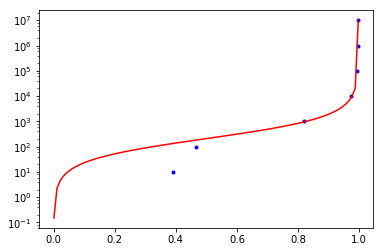

In [12]:
fit_and_plot_semilogy(dataset['V0'], dataset['R'], model_b)

(array([   0.99751526,  754.48968461]),
 array([[  1.15704743e-12,   1.14934317e-05],
        [  1.14934317e-05,   1.15101028e+02]]))

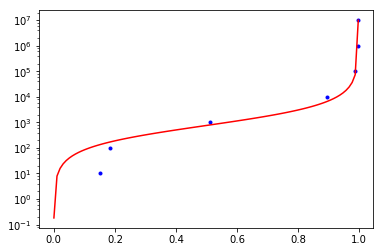

In [13]:
fit_and_plot_semilogy(dataset['V1'], dataset['R'], model_b)

(array([  9.98515655e-01,   1.07841621e+04]),
 array([[  8.66535771e-12,   8.60930076e-05],
        [  8.60930076e-05,   8.62346165e+02]]))

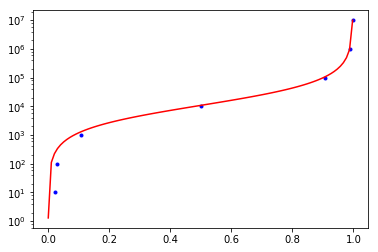

In [14]:
fit_and_plot_semilogy(dataset['V2'], dataset['R'], model_b)

(array([  9.88463650e-01,   9.91423009e+04]),
 array([[  5.30063641e-11,   5.36734653e-04],
        [  5.36734653e-04,   5.47849430e+03]]))

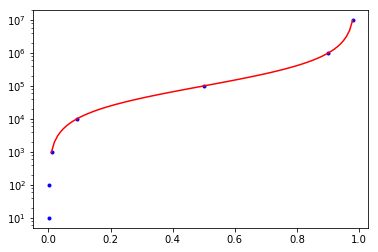

In [15]:
fit_and_plot_semilogy(dataset['V3'], dataset['R'], model_b)

(array([  9.88463650e-01,   9.91423009e+04]),
 array([[  5.30063641e-11,   5.36734653e-04],
        [  5.36734653e-04,   5.47849430e+03]]))

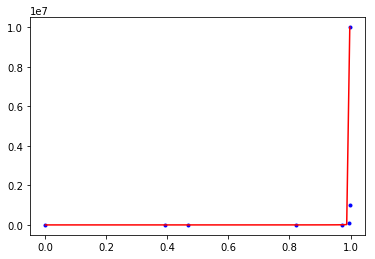

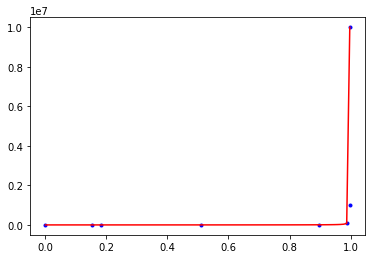

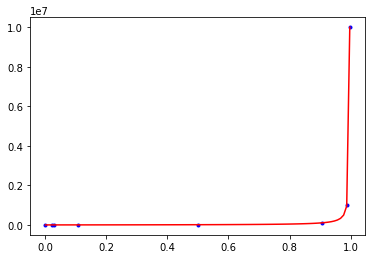

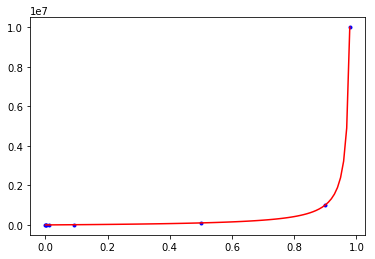